# Visualizaciones con matplotlib y seaborn

Algunos *shortcuts* útiles:
* tab --> ofrece sugerencias sobre funciones y atributos 
* shift + tab --> muestra la documentación del objeto 
* shift + enter --> run cell

[Documentación de seaborn](https://seaborn.pydata.org/)

[Documentación de matplotlib](https://matplotlib.org/)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set_style('darkgrid') # establecemos el estilo general de seaborn que queremos usas
warnings.filterwarnings("ignore") # para que no nos muestre los warnings

# comando para que se puedan mostrar las gráficas en el notebook:
%matplotlib inline

In [2]:
# Importamos la base con la que estaremos trabajando
data = pd.read_csv('data/indicadores_clean.csv')
data.head()

,country,code,region,inc_group,cellph_per100,co2_perc,land_area,electricity,fertility,fuel_exps_pc,...,mil_exp,internet_users,population,rd_exp,taxRev_pc,val_primary,val_industry,val_manufacturing,val_services,region_code
0,Aruba,ABW,Latin America & Caribbean,high,NaN,8.410064,180.0,100.00000,1.798,0.250657,...,NaN,97.170000,105845.0,NaN,NaN,NaN,NaN,NaN,NaN,LAm_Ca
1,Afghanistan,AFG,South Asia,low,67.350573,0.293946,652860.0,97.70000,4.477,NaN,...,0.984561,11.447688,37172386.0,NaN,7.585382,21.081086,21.823223,11.370465,52.761719,SAs
2,Angola,AGO,Sub-Saharan Africa,lower_mid,44.734977,1.290307,1246700.0,41.88623,5.623,96.194403,...,1.777138,14.339079,30809762.0,NaN,11.002019,9.831169,42.643567,6.752681,46.980994,SSAf
3,Albania,ALB,Europe & Central Asia,upper_mid,123.736096,1.978763,27400.0,100.00000,1.710,1.567523,...,1.178901,71.847041,2866376.0,NaN,18.515790,19.849978,21.141999,5.684427,46.697169,Eu_CAs
4,Andorra,AND,Europe & Central Asia,high,104.381212,5.832906,470.0,100.00000,NaN,0.122804,...,NaN,98.871436,77006.0,NaN,NaN,0.492101,9.844719,3.207886,79.204103,Eu_CAs


In [3]:
# Importamos la base de metadatos (para saber a qué se refiere cada variable)
meta_data = pd.read_csv('data/indicadores_metadata.csv')
meta_data

,indicador,descripcion,year
0,cellph_per100,Mobile cellular subscriptions (per 100 people),2017
1,co2_perc,CO2 emissions (metric tons per capita),2014
2,land_area,Land area (sq. km),2017
3,electricity,Access to electricity (% of population),2017
4,fertility,"Fertility rate, total (births per woman)",2017
5,fuel_exps_pc,Fuel exports (% of merchandise exports),2014
6,start_business,Time required to start a business (days),2018
7,foreign_inv,"Foreign direct investment, net inflows (BoP, c...",2017
8,gdp,GDP (current US$),2017
9,gdp_pc,"GDP per capita, PPP (current international $)",2017


In [4]:
# Veamos qué tipo de dato hay en cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 27 columns):
country              216 non-null object
code                 216 non-null object
region               216 non-null object
inc_group            216 non-null object
cellph_per100        201 non-null float64
co2_perc             204 non-null float64
land_area            214 non-null float64
electricity          214 non-null float64
fertility            199 non-null float64
fuel_exps_pc         157 non-null float64
start_business       188 non-null float64
foreign_inv          197 non-null float64
gdp                  200 non-null float64
gdp_pc               191 non-null float64
growth_gdp_pc        200 non-null float64
hiv_prev             135 non-null float64
servs_mill           213 non-null float64
mil_exp              150 non-null float64
internet_users       203 non-null float64
population           216 non-null float64
rd_exp               97 non-null float64
taxRev_pc         

In [5]:
# Cuando tenemos variables categóricas, conviene explicitar su tipo. 
# Esto facilitará el proceso de las visualizaciones.
# Para este caso, las variables categóricas son: region, inc_group (income group) y region_code

# Convertimos el tipo de las columnas:
data.region = data.region.astype('category')
data.inc_group = data.inc_group.astype('category')
data.region_code = data.region_code.astype('category')

#### Diccionarios para el estilo de los de para las gráficas

In [6]:
# Creamos unos diccionarios que nos servirán más adelante, para indicar cuestiones de estilo en nuestras gráficas.
# Esto se podría hacer directamente sobre las gráficas pero, si nos interesa tener un estilo unificado, conviene
# hacerlo todo en un solo lugar (además de que los cambios que queramos hacer serán más sencillos de hacer)

# Diccionario para los títulos
title_font = { 'size': 16,
             }

# Diccionario para los textos en los ejes
axes_font = {'size':14, 'color':  'darkred',}

#### Histogramas

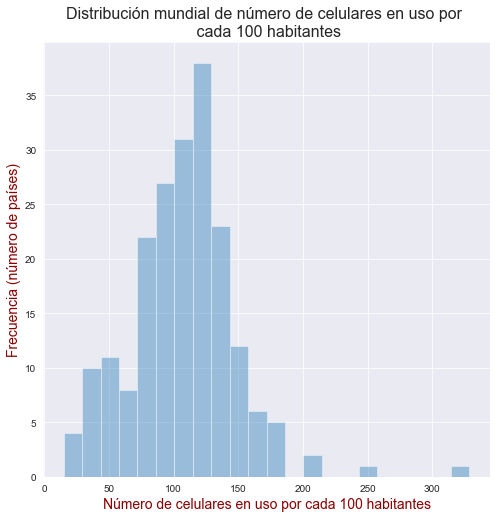

In [7]:
# Generar un histograma a con el número de celulares por cada 100 habitantes...

# Fijamos el tamaño de nuestra gráfica
plt.figure(figsize=(8,8))

vis01 = sns.distplot(data.cellph_per100.dropna(), kde=False)
# Aquí llamamos el método de dropna() para eliminar las observaciones con valores faltantes
# Notar que no importa si usamos data.cellph_per100, data['cellph_per100'] o data.loc['cellph_per100'] --> Lo importante es pasar un argumento válido

# Ponemos un título a la gráfica y a cada eje (nótese que aquí se usan funciones de pyplot directamente)
plt.title('Distribución mundial de número de celulares en uso por \n cada 100 habitantes', fontdict=title_font)
plt.ylabel('Frecuencia (número de países)', fontdict=axes_font)
plt.xlabel('Número de celulares en uso por cada 100 habitantes', fontdict=axes_font)

plt.show()

#### Kernel Density Estimation Plot

In [8]:
# Veamos cuáles son las categorías que tenemos para inc_group (income group):
for cat in data.inc_group.cat.categories: print(cat)

high
low
lower_mid
upper_mid


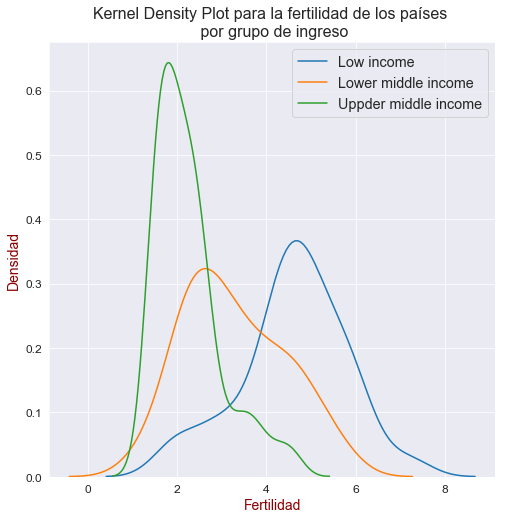

In [9]:
plt.figure(figsize=(8,8))
# Podemos hacer varias gráficas en un solo lugar
vis01a = sns.kdeplot(data.loc[data.inc_group == 'low', 'fertility'], label='Low income')
vis01b = sns.kdeplot(data.loc[data.inc_group == 'lower_mid', 'fertility'], label='Lower middle income')
vis01c = sns.kdeplot(data.loc[data.inc_group == 'upper_mid', 'fertility'], label='Uppder middle income')

# Ponemos título a la gráfica y 
plt.title('Kernel Density Plot para la fertilidad de los países \n por grupo de ingreso', fontdict=title_font)
plt.ylabel('Densidad', fontdict=axes_font)
plt.xlabel('Fertilidad', fontdict=axes_font)

# Para cambiar el estilo de la leyenda
plt.legend(fontsize='x-large', title_fontsize='20')

# Modificamos el estilo y layout de los 'ticks' en los dos ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()

#### Boxplots

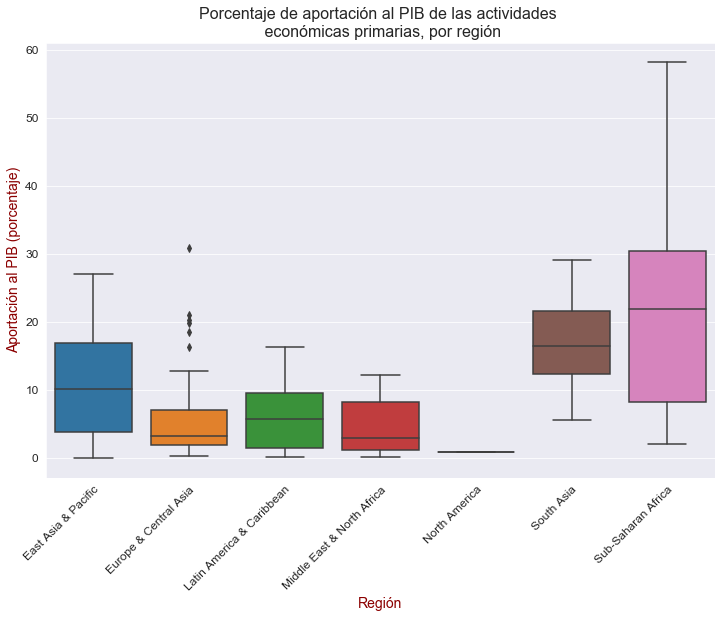

In [10]:
plt.figure(figsize=(12,8))
# Boxplots
# Notar que la manera en que pide la información es diferente de distplot)()
vis02 = sns.boxplot(data=data, x='region', y='val_primary')

# Ponemos título a la gráfica y a los ejes
plt.title('Porcentaje de aportación al PIB de las actividades \n económicas primarias, por región', fontdict=title_font)
plt.ylabel('Aportación al PIB (porcentaje)', fontdict=axes_font)
plt.xlabel('Región', fontdict=axes_font)

# Modificamos el estilo y layout de los 'ticks' en los dos ejes
plt.xticks(fontsize=12, rotation=45, ha="right" , rotation_mode='anchor')
plt.yticks(fontsize=12)


plt.show()

#### Violin plots

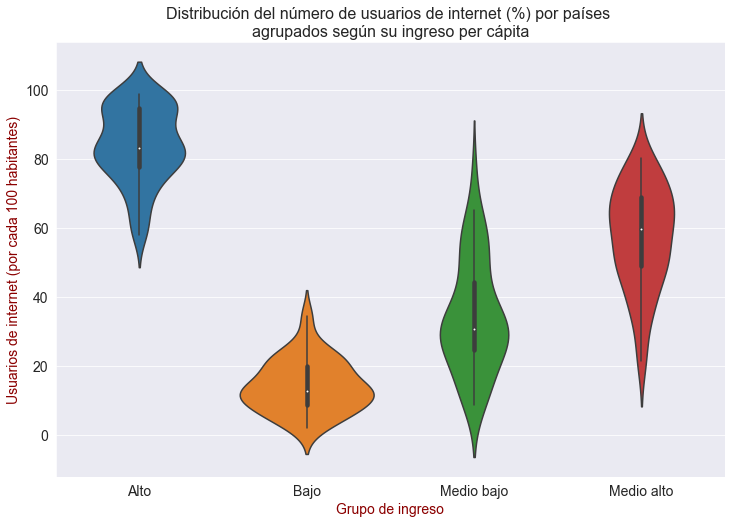

In [11]:
plt.figure(figsize=(12,8))

# Definimos un subconjunto de nuestros datos (nos interesa que no haya valores faltantes en la columna de internet_users)
data06 = data.loc[data.internet_users.notnull(), :]
vis06 = sns.violinplot(data=data06, x='inc_group', y='internet_users')


# Ponemos título a la gráfica
plt.title('Distribución del número de usuarios de internet (%) por países \nagrupados según su ingreso per cápita', fontdict=title_font)
plt.ylabel('Usuarios de internet (por cada 100 habitantes)', fontdict=axes_font)
plt.xlabel('Grupo de ingreso', fontdict=axes_font)

# Camibamos las etiquetas del eje de las x, y el tamaño fuente de ambos ejes
plt.xticks(ticks=[0,1,2,3], labels=['Alto', 'Bajo', 'Medio bajo', 'Medio alto'], fontsize=14)
plt.yticks(fontsize=14)

plt.show()


#### Diagrama de dispersión (scatter plot)

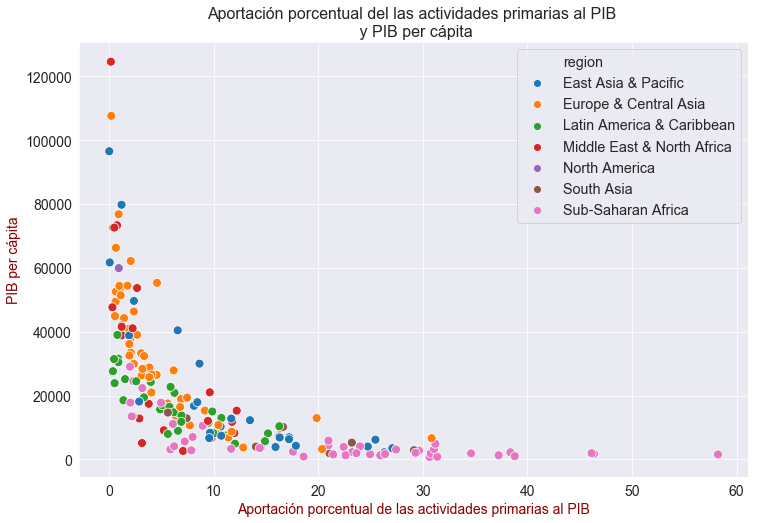

In [12]:
plt.figure(figsize=(12,8))

vis03 = sns.scatterplot(data=data, x='val_primary', y='gdp_pc', hue='region', s=80)

# Ponemos título a la gráfica 
plt.title('Aportación porcentual del las actividades primarias al PIB \n y PIB per cápita', fontdict=title_font)
plt.xlabel('Aportación porcentual de las actividades primarias al PIB', fontdict=axes_font)
plt.ylabel('PIB per cápita', fontdict=axes_font)

# Para cambiar el estilo de la leyenda
plt.legend(fontsize='x-large', title_fontsize='15')

# Modificamos el estilo y layout de los 'ticks' en los dos ejes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.show()

#### Linear model plot

<Figure size 864x576 with 0 Axes>

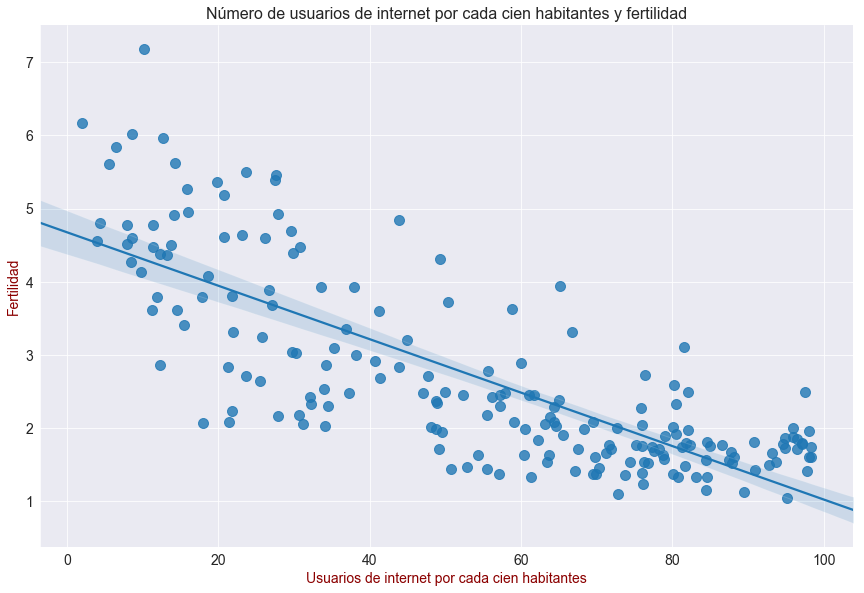

In [13]:
plt.figure(figsize=(12,8))

vis03 = sns.lmplot(data=data, x='internet_users', y='fertility', size=8, \
                   aspect=1.5, scatter_kws = {'s':100, 'marker':'P'})
#  NOTA: Esta gráfica no ajusta su tamaño... En la descripción dice: "it fits across a FacetGrid". Por eso hay que indicar el tamaño manualmente

# Ponemos título a la gráfica 
plt.title('Número de usuarios de internet por cada cien habitantes y fertilidad', fontdict=title_font)
plt.xlabel('Usuarios de internet por cada cien habitantes', fontdict=axes_font)
plt.ylabel('Fertilidad', fontdict=axes_font)


# Modificamos el estilo y layout de los 'ticks' en los dos ejes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.show()


In [14]:
# NOTA: Si queremos cambiar el color de los markers en lmplot, vemos que hay unos argumentos
# que se pasan en forma de diccionario (scatter_kws o line_kws)
# En https://seaborn.pydata.org/generated/seaborn.lmplot.html, al buscar 'scatter_kws', vemos
# que hace referencia a plt.scatter y plt.plot (recordemos que seaborn se deriva de matplotlib)
# Al buscar en la página de matplotlib.pyplot.scatter (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html), 
# podemos ver qué argumentos recibe la función. 

#### Cómo crear un Facet Grid

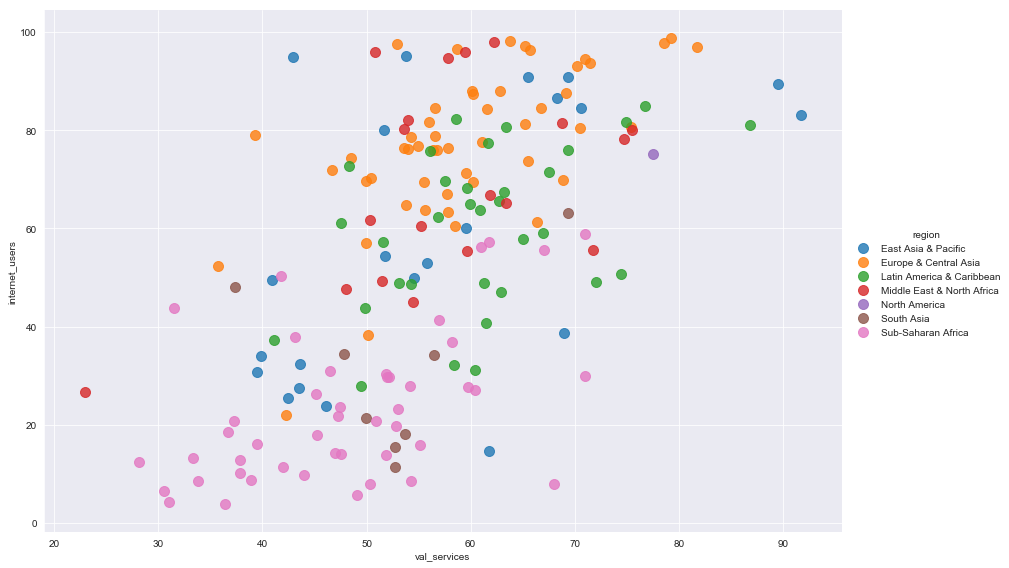

In [15]:
# Nótese que aquí el tamaño de la gráfica y el ratio altura-ancho se especifica directamente sobre la función lmplot()
vis03 = sns.lmplot(data=data, x='val_services', y='internet_users', size=8, \
                   aspect=1.5, scatter_kws = {'s':100, 'marker':'P'}, hue='region', fit_reg=False)

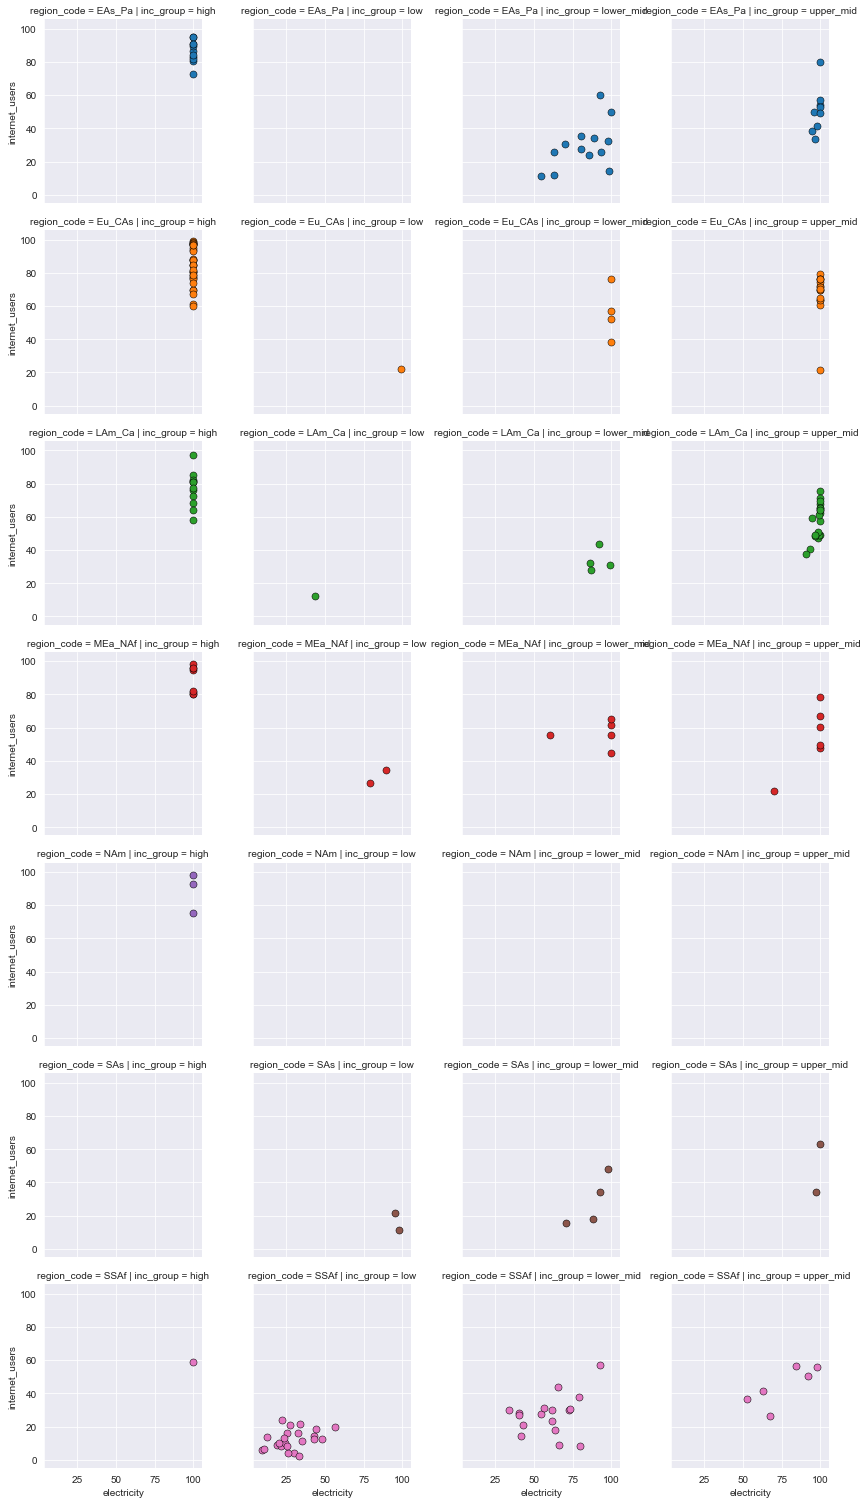

In [16]:
# Supongamos que nos interesa explorar la relación entre usuarios de internet, acceso electricidad
# según región y grupo de ingresos del país
g = sns.FacetGrid(data, row='region_code', col='inc_group', hue='region_code')

kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'electricity', 'internet_users', **kws) 

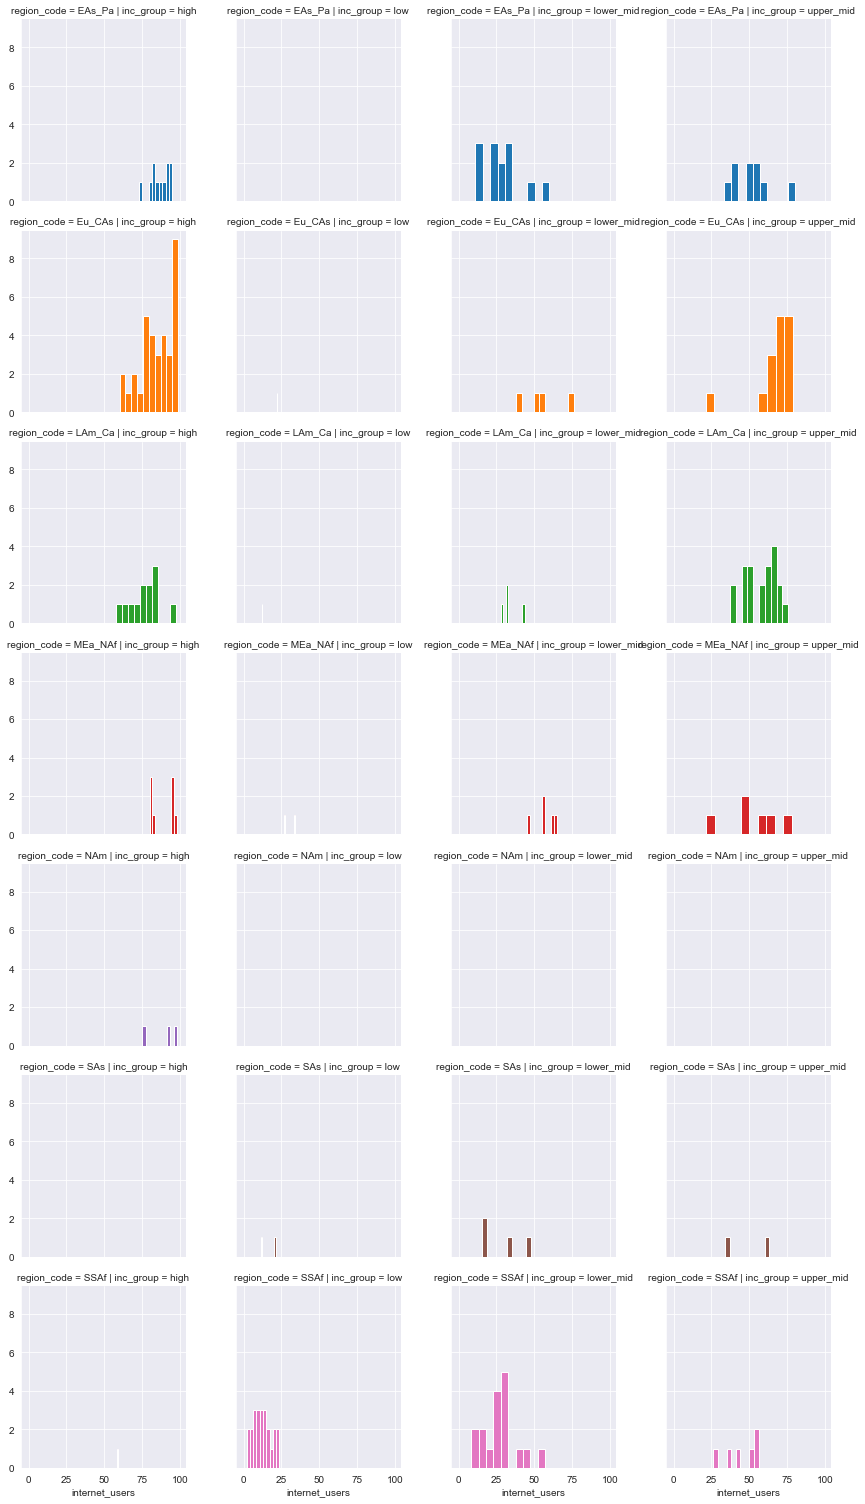

In [17]:
# Podemos asignar cualquier gráfica al grid
g = sns.FacetGrid(data, row='region_code', col='inc_group', hue='region_code')
g = g.map(plt.hist, 'internet_users') 


#### Cómo incorporar coordenadas y líneas en la gráfica

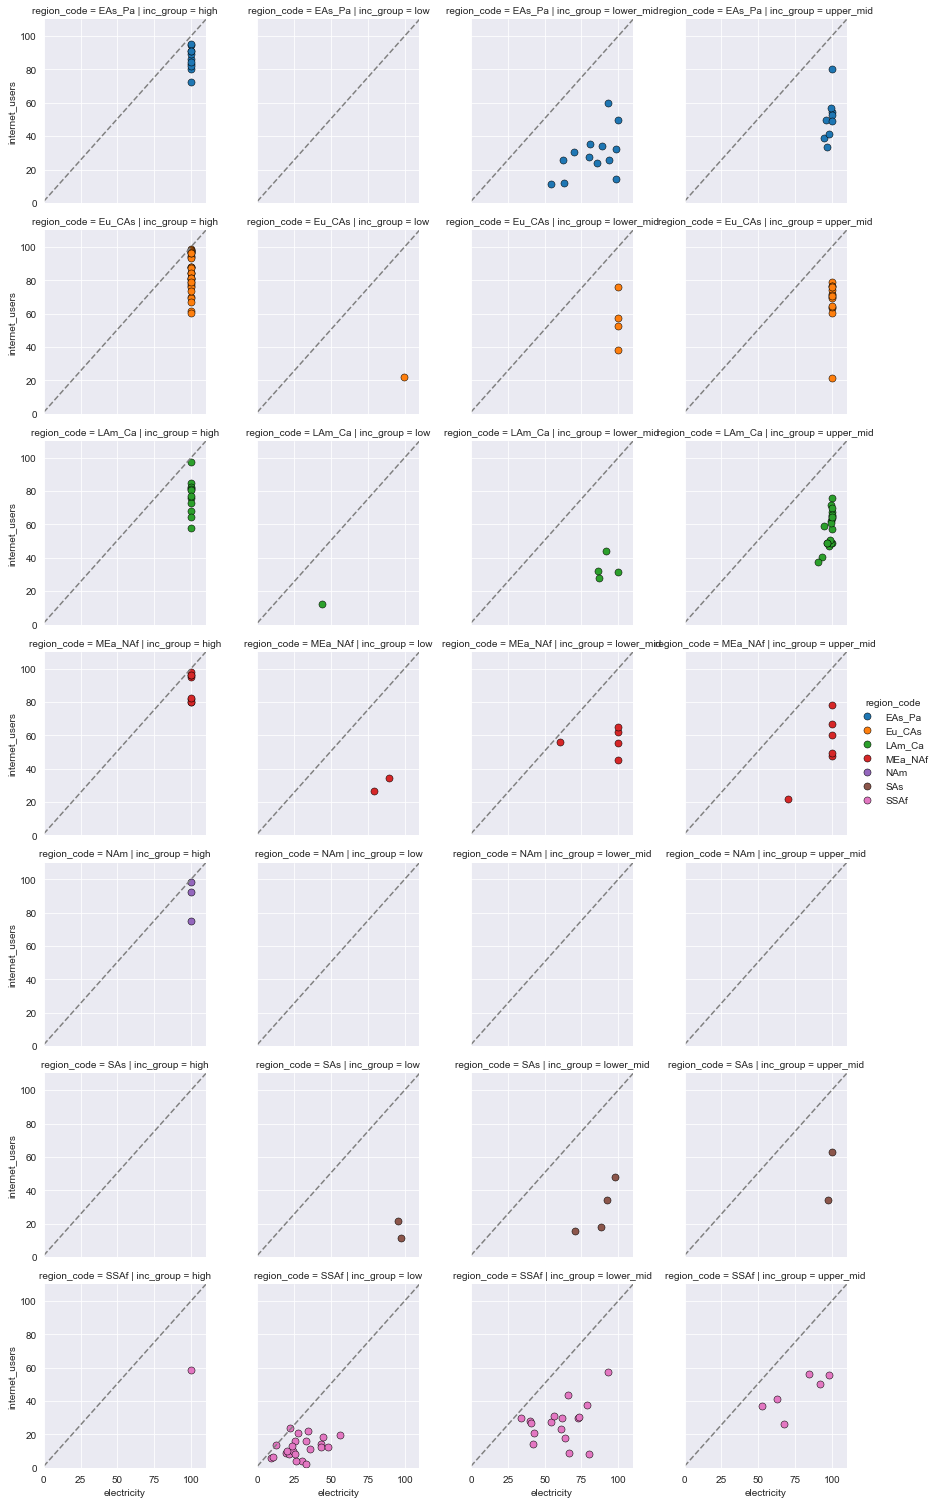

In [18]:
# Supongamos que nos interesa explorar la relación entre usuarios de internet, acceso electricidad
# según región y grupo de ingresos del país
g = sns.FacetGrid(data, row='region_code', col='inc_group', hue='region_code')

kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'electricity', 'internet_users', **kws) 
g.set(xlim=(0,110), ylim=(0,110))


for ax in g.axes.flat: # convierte el array para tratarlo como un objeto de una sola dimensión
    ax.plot((0,110), (1,110), c='gray', ls='--')
g.add_legend()
plt.show()

#### Cómo crear dashboards 

tipo de "f": <class 'matplotlib.figure.Figure'>
tipo de "axes": <class 'numpy.ndarray'>


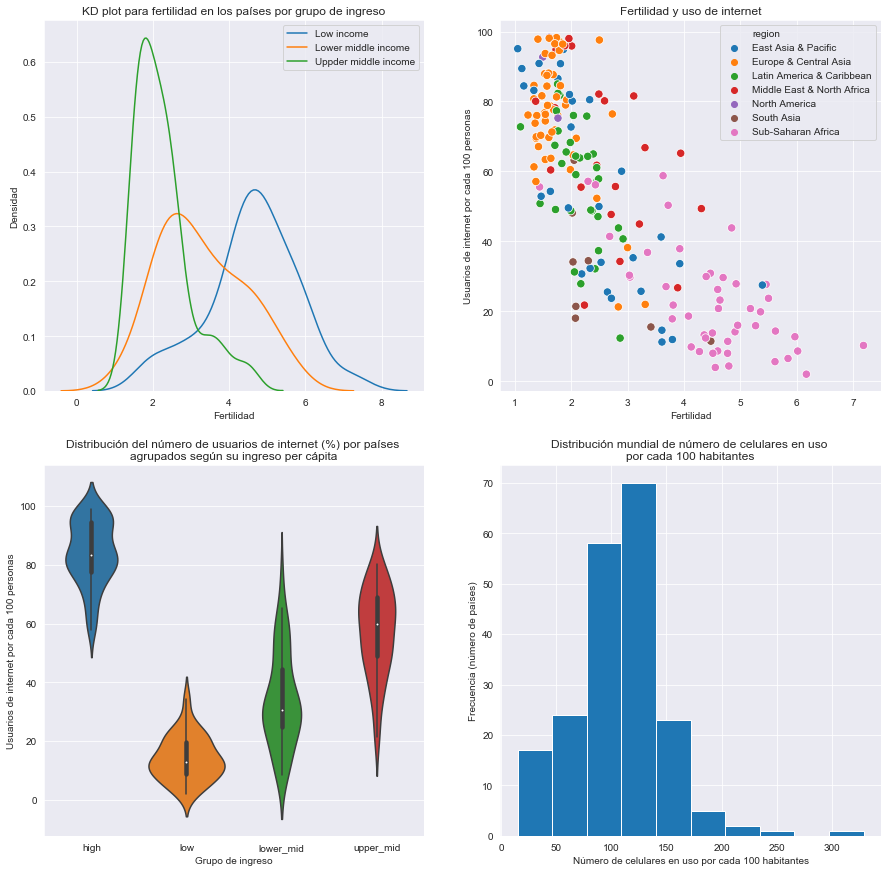

In [19]:
sns.set_style('darkgrid')

# creamos un dashboard con 4 «espacios» para gráficas (2x2)
f, axes = plt.subplots(2, 2, figsize=(15,15))

# veamos qué tipo de objetos regresa la función subplots()
print(f'tipo de "f": {type(f)}\ntipo de "axes": {type(axes)}')

# ahora asignemos cuatro gráficas a nuestro dashboard..
# --------------------------- axes[0,0]
vis01a = sns.kdeplot(data.loc[data.inc_group == 'low', 'fertility'], label='Low income', ax=axes[0,0])
vis01b = sns.kdeplot(data.loc[data.inc_group == 'lower_mid', 'fertility'], label='Lower middle income', ax=axes[0,0])
vis01c = sns.kdeplot(data.loc[data.inc_group == 'upper_mid', 'fertility'], label='Uppder middle income', ax=axes[0,0])
axes[0,0].title.set_text('KD plot para fertilidad en los países por grupo de ingreso')
axes[0,0].set_xlabel('Fertilidad')
axes[0,0].set_ylabel('Densidad')

# --------------------------- axes[0,1]
vis03 = sns.scatterplot(data=data, x='fertility', y='internet_users',  \
                    hue='region', ax=axes[0,1], s=70)
axes[0,1].title.set_text('Fertilidad y uso de internet')
axes[0,1].set_xlabel('Fertilidad')
axes[0,1].set_ylabel('Usuarios de internet por cada 100 personas')


# --------------------------- axes[1,0]
data06 = data.loc[data.internet_users.notnull(), :]
vis06 = sns.violinplot(data=data06, x='inc_group', y='internet_users', ax=axes[1,0])
axes[1,0].title.set_text('Distribución del número de usuarios de internet (%) por países \nagrupados según su ingreso per cápita')
axes[1,0].set_xlabel('Grupo de ingreso')
axes[1,0].set_ylabel('Usuarios de internet por cada 100 personas')

# -------------------------- axes[1,1]
# Si quisiéramos incluir una gráfica generada directamente con matplotlib.pyplot
# (en lugar de con seaborn), es necesario cambiar un poco la sintaxis. Por ejemplo,
# para un histograma de pyplot:
axes[1,1].hist(data.cellph_per100.dropna())
axes[1,1].title.set_text('Distribución mundial de número de celulares en uso \npor cada 100 habitantes')
axes[1,1].set_xlabel('Número de celulares en uso por cada 100 habitantes')
axes[1,1].set_ylabel('Frecuencia (número de países)')


plt.show()



#### Cómo exportar las gráficas

tipo de "f": <class 'matplotlib.figure.Figure'>
tipo de "axes": <class 'numpy.ndarray'>


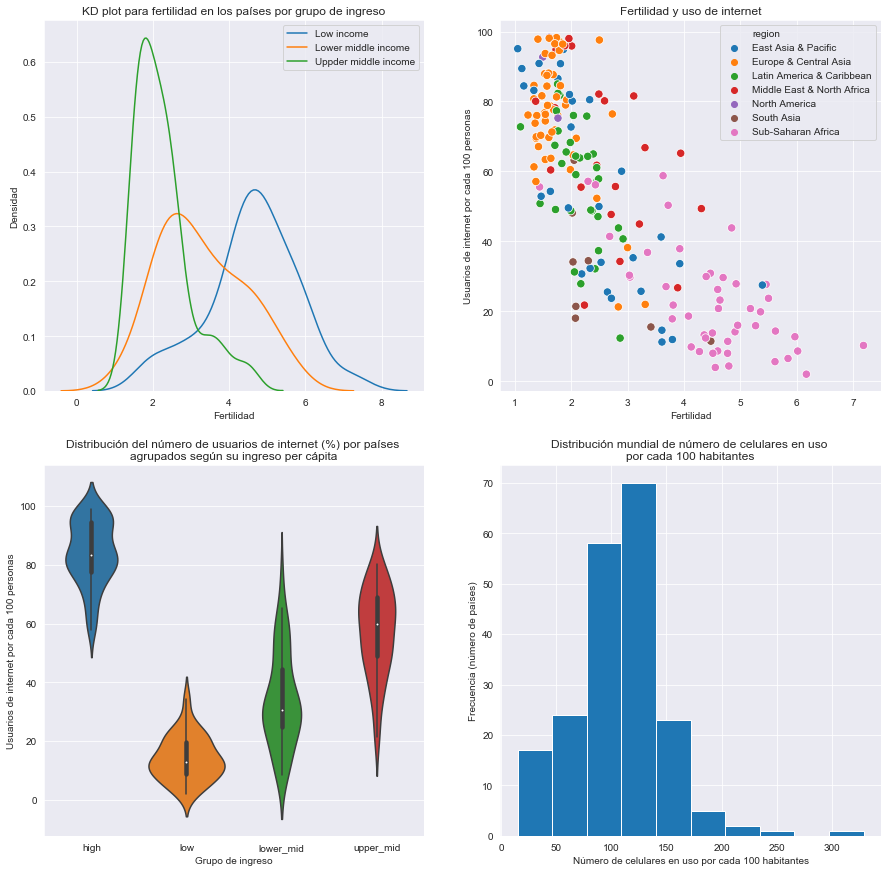

In [20]:
sns.set_style('darkgrid')

# creamos un dashboard con 4 «espacios» para gráficas (2x2)
f, axes = plt.subplots(2, 2, figsize=(15,15))

# veamos qué tipo de objetos regresa la función subplots()
print(f'tipo de "f": {type(f)}\ntipo de "axes": {type(axes)}')

# ahora asignemos cuatro gráficas a nuestro dashboard..
# --------------------------- axes[0,0]
vis01a = sns.kdeplot(data.loc[data.inc_group == 'low', 'fertility'], label='Low income', ax=axes[0,0])
vis01b = sns.kdeplot(data.loc[data.inc_group == 'lower_mid', 'fertility'], label='Lower middle income', ax=axes[0,0])
vis01c = sns.kdeplot(data.loc[data.inc_group == 'upper_mid', 'fertility'], label='Uppder middle income', ax=axes[0,0])
axes[0,0].title.set_text('KD plot para fertilidad en los países por grupo de ingreso')
axes[0,0].set_xlabel('Fertilidad')
axes[0,0].set_ylabel('Densidad')

# --------------------------- axes[0,1]
vis03 = sns.scatterplot(data=data, x='fertility', y='internet_users',  \
                    hue='region', ax=axes[0,1], s=70)
axes[0,1].title.set_text('Fertilidad y uso de internet')
axes[0,1].set_xlabel('Fertilidad')
axes[0,1].set_ylabel('Usuarios de internet por cada 100 personas')


# --------------------------- axes[1,0]
data06 = data.loc[data.internet_users.notnull(), :]
vis06 = sns.violinplot(data=data06, x='inc_group', y='internet_users', ax=axes[1,0])
axes[1,0].title.set_text('Distribución del número de usuarios de internet (%) por países \nagrupados según su ingreso per cápita')
axes[1,0].set_xlabel('Grupo de ingreso')
axes[1,0].set_ylabel('Usuarios de internet por cada 100 personas')

# -------------------------- axes[1,1]
# Si quisiéramos incluir una gráfica generada directamente con matplotlib.pyplot
# (en lugar de con seaborn), es necesario cambiar un poco la sintaxis. Por ejemplo,
# para un histograma de pyplot:
axes[1,1].hist(data.cellph_per100.dropna())
axes[1,1].title.set_text('Distribución mundial de número de celulares en uso \npor cada 100 habitantes')
axes[1,1].set_xlabel('Número de celulares en uso por cada 100 habitantes')
axes[1,1].set_ylabel('Frecuencia (número de países)')


# Para guardar las gráficas, en lugar de plt.show(), ponemos
plt.savefig('dashboard.png') # para una imagen rasterizada
plt.savefig('dashboard.pdf') # para una imagen vectorizada